In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("D:\PRACTICE\House_Rent_Dataset.csv")

# first look
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_4672\3480539735.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\PRACTICE\House_Rent_Dataset.csv")


,Posted On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,18-May-22,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-May-22,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-May-22,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,4-Jul-22,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,9-May-22,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Basic Data Understanding

In [3]:
# shape of dataset
print("Rows & Columns:", df.shape)

# data info
df.info()

# statistical summary
df.describe(include='all')


Rows & Columns: (4746, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area_Type          4746 non-null   object
 6   Area_Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing_Status  4746 non-null   object
 9   Tenant_Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point_of_Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


,Posted On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,6-Jul-22,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


Data Cleaning

1.Drop Empty / Irrelevant Columns

In [4]:
df.rename(columns={'Column1': 'Posted_Date'}, inplace=True)


Missing Values Check

In [5]:
df.isnull().sum()


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area_Type            0
Area_Locality        0
City                 0
Furnishing_Status    0
Tenant_Preferred     0
Bathroom             0
Point_of_Contact     0
dtype: int64

Univariate Analysis (Single Column)

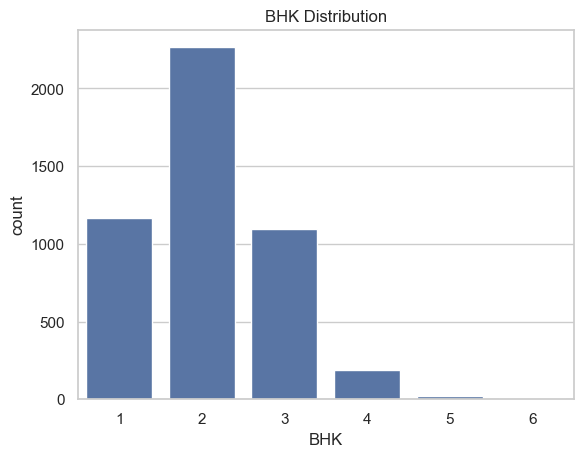

In [6]:
plt.figure()
sns.countplot(x='BHK', data=df)
plt.title("BHK Distribution")
plt.show()


Min: 1

Max: 6

Average: ~2 BHK
👉 Most rented houses are 2 BHK

Rent Distribution

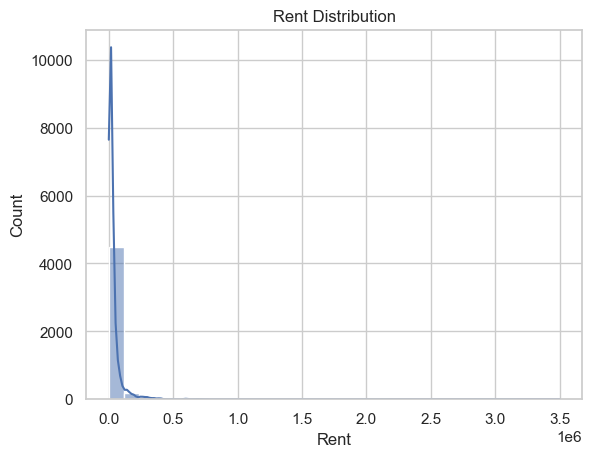

In [7]:
plt.figure()
sns.histplot(df['Rent'], bins=30, kde=True)
plt.title("Rent Distribution")
plt.show()


Most houses are 2 BHK, ~900–1000 sq ft

City-wise Listings

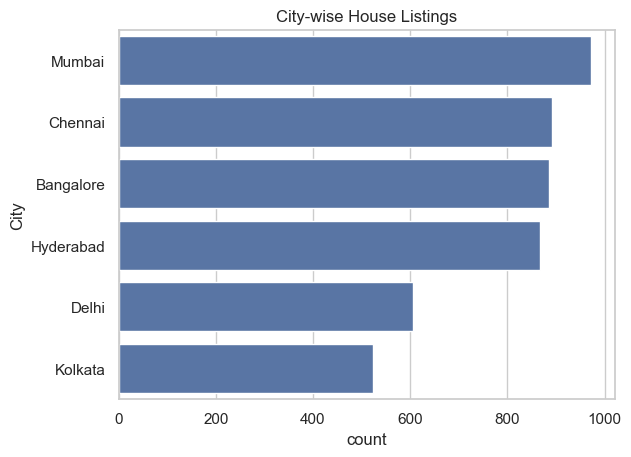

In [8]:
plt.figure()
sns.countplot(y='City', data=df, order=df['City'].value_counts().index)
plt.title("City-wise House Listings")
plt.show()


Top cities:

Mumbai (highest listings)

Kolkata

Delhi

Bangalore

Hyderabad

Chennai

 Insight: Metro cities dominate the rental market.

Bivariate Analysis 

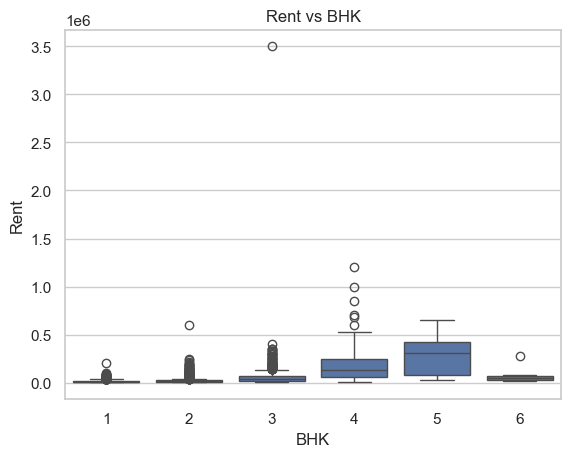

In [9]:
#Rent vs BHK
plt.figure()
sns.boxplot(x='BHK', y='Rent', data=df)
plt.title("Rent vs BHK")
plt.show()


The plot shows that rent increases with the number of bedrooms. Higher BHK properties also have more price variation due to luxury and location factors.”

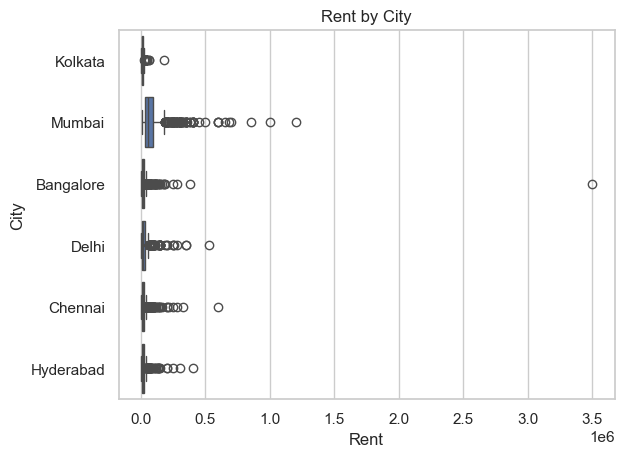

In [10]:
#Rent vs City
plt.figure()
sns.boxplot(y='City', x='Rent', data=df)
plt.title("Rent by City")
plt.show()


Most houses are 2 BHK, ~900–1000 sq ft

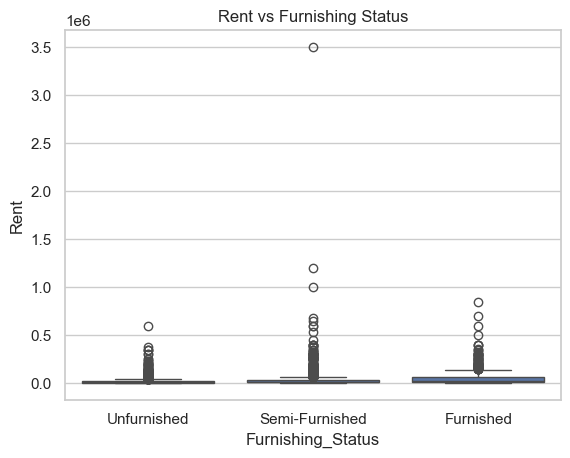

In [11]:
#Rent vs Furnishing Status
plt.figure()
sns.boxplot(x='Furnishing_Status', y='Rent', data=df)
plt.title("Rent vs Furnishing Status")
plt.show()


Furnishing status & BHK strongly influence rent

Multivariate Analysis

Correlation Heatmap

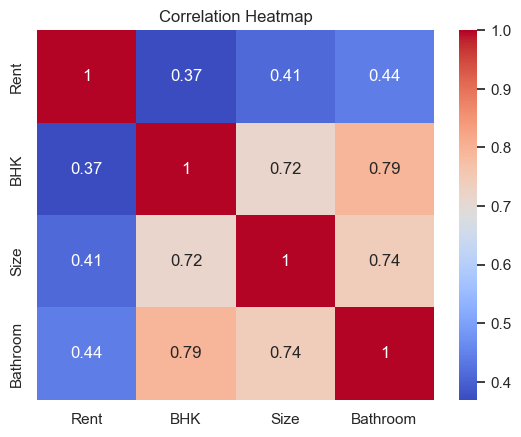

In [12]:
plt.figure()
sns.heatmap(df[['Rent', 'BHK', 'Size', 'Bathroom']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# average rent by city
df.groupby('City')['Rent'].mean().sort_values(ascending=False)

# average rent by BHK
df.groupby('BHK')['Rent'].mean()

# average rent by furnishing status
df.groupby('Furnishing_Status')['Rent'].mean()


Furnishing_Status
Furnished         56110.305882
Semi-Furnished    38718.810751
Unfurnished       22461.635813
Name: Rent, dtype: float64

Which city is most expensive per square foot?

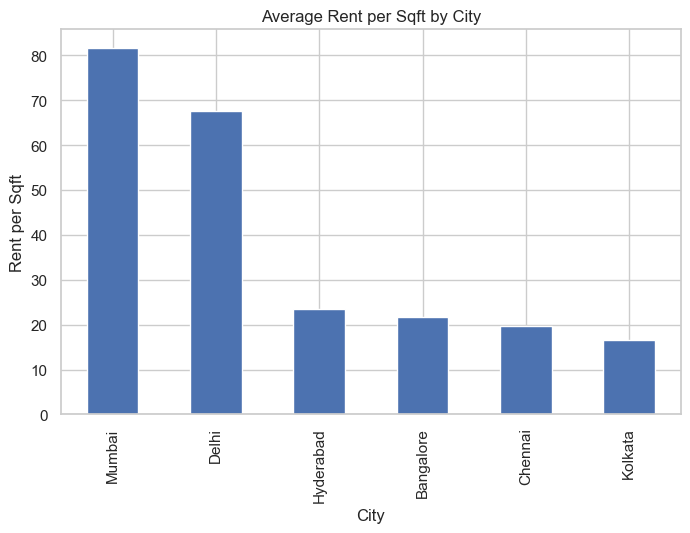

In [14]:
df['Rent_per_sqft'] = df['Rent'] / df['Size']

rent_sqft_city = (
    df.groupby('City')['Rent_per_sqft']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
rent_sqft_city.plot(kind='bar')
plt.title("Average Rent per Sqft by City")
plt.ylabel("Rent per Sqft")
plt.show()


Is fully furnished rent increase justified?

In [15]:
furnishing_analysis = (
    df.groupby('Furnishing_Status')
    .agg(
        avg_rent=('Rent', 'mean'),
        avg_size=('Size', 'mean')
    )
)

furnishing_analysis['Rent_per_sqft'] = (
    furnishing_analysis['avg_rent'] / furnishing_analysis['avg_size']
)

furnishing_analysis


,avg_rent,avg_size,Rent_per_sqft
Furnishing_Status,,,
Furnished,56110.305882,1047.386765,53.571716
Semi-Furnished,38718.810751,1077.342959,35.939169
Unfurnished,22461.635813,801.316253,28.030925


Which tenant type generates higher rent across cities?

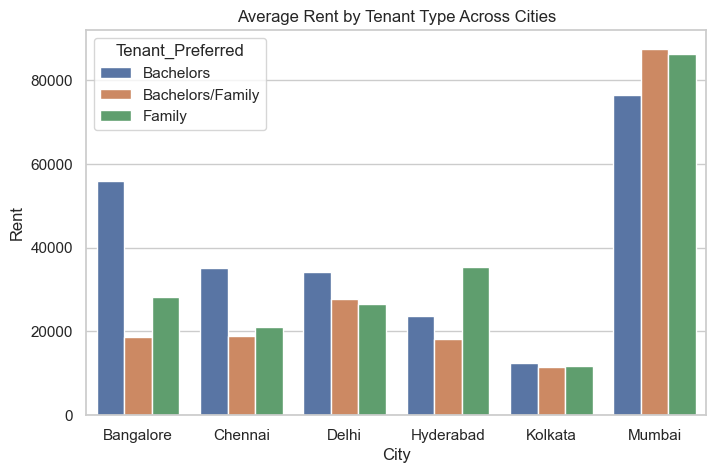

In [16]:
tenant_city = (
    df.groupby(['City', 'Tenant_Preferred'])['Rent']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(x='City', y='Rent', hue='Tenant_Preferred', data=tenant_city)
plt.title("Average Rent by Tenant Type Across Cities")
plt.show()

Which BHK types dominate each city?

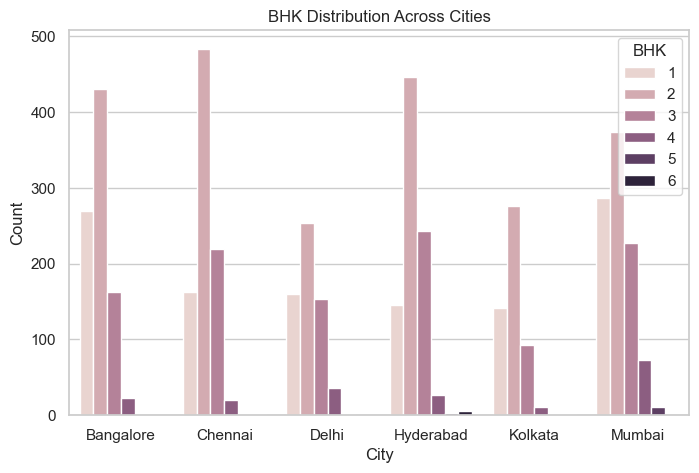

In [17]:
bhk_city = (
    df.groupby(['City', 'BHK'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(8,5))
sns.barplot(x='City', y='Count', hue='BHK', data=bhk_city)
plt.title("BHK Distribution Across Cities")
plt.show()

Does floor level affect rent?



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell\AppData\Local\Temp\ipykernel_4672\60688308.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Floor_Number'] = df['Floor'].str.extract('(\d+)').astype(float)


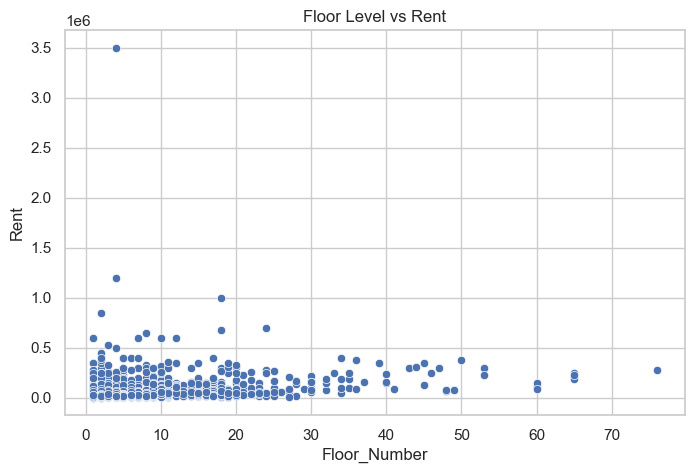

In [18]:
df['Floor_Number'] = df['Floor'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Floor_Number', y='Rent', data=df)
plt.title("Floor Level vs Rent")
plt.show()


How do City, Size, and BHK together affect rent?

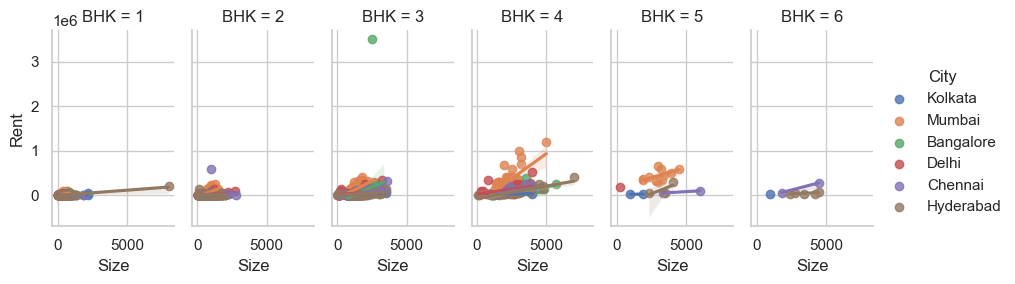

In [19]:
sns.lmplot(
    x='Size',
    y='Rent',
    hue='City',
    col='BHK',
    data=df,
    height=3,      # height of EACH subplot
    aspect=0.5     # width = height × aspect
)


In [21]:
features = [
    'City',
    'BHK',
    'Size',
    'Bathroom',
    'Furnishing_Status',
    'Tenant_Preferred'
]

target = 'Rent'

df_ml = df[features + [target]]

df_ml = pd.get_dummies(
    df_ml,
    columns=['City', 'Furnishing_Status', 'Tenant_Preferred'],
    drop_first=True
)



In [22]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Rent', axis=1)
y = df_ml['Rent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(22425.296079275646, np.float64(43856.96267497334), 0.5173778813119227)

MAE → average error in ₹

R² → how well model explains rent variation

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_score(y_test, y_pred_rf)


0.5217879483427554

In [27]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


Size                                 0.337134
Bathroom                             0.254546
City_Mumbai                          0.174998
Tenant_Preferred_Bachelors/Family    0.072802
Furnishing_Status_Unfurnished        0.050009
Furnishing_Status_Semi-Furnished     0.041749
City_Delhi                           0.025282
BHK                                  0.018886
Tenant_Preferred_Family              0.011621
City_Chennai                         0.007050
dtype: float64

Size and City are the most influential factors in rent prediction.


* short report 

City and property size are the strongest drivers of rent

Rent per square foot gives a more accurate cost comparison than total rent

2–3 BHK properties offer the best balance between demand and pricing

Fully furnished houses add value mainly in metro cities

Family tenants generally pay higher and more stable rents

Floor level has a moderate impact, stronger in high-rise cities

Rent is influenced by multiple factors together, not a single feature

Machine learning models confirm EDA findings, with size and city being the most important predictors

Rent prediction models are useful for estimation and decision support, not exact pricing